# Data Cleaning : Time Series Data


- A hypothetical company, ABC Financial Services Corp makes financial investment decisions on behalf of it's clients based on the company's economic research. A lot of these decisions involve speculating whether financial instruments will increase or decrease in value in the future.
- ABC Corp utilizes several economic indicators but there is one in particular that is heavily weighted in their analysis and that is the [University of Michigan's Consumer Sentiment Survey](https://en.wikipedia.org/wiki/University_of_Michigan_Consumer_Sentiment_Index).
- The only problem is that they have to wait for the release of this indicator which erodes some of their competitive advantage in the market and they would like a way to predict this number.
- I propose to use a form of Machine Learning (ML) to make Time Series preditions on the final Consumer Sentiment number to be released.
- To do this we are going to use other economic indicators (as features) released before and data from various relevant industries to construct a dataset that is ready to run on predictive algorithims.
- The historical datasets that ABC Corp uses will be downloaded as follows:
    - [The Dow Jones Index](https://finance.yahoo.com/quote/%5EDJI/history/)
    - [US Unemployemnt (Jobless Claims) data from the US Department of Labor](https://fred.stlouisfed.org/series/UNRATE)
    - [Historical price of Crude Oil in the open market](https://fred.stlouisfed.org/series/MCOILBRENTEU)
    - [New Housing Starts from US Census Beareau](https://fred.stlouisfed.org/series/HOUST#0)
    - [Total Vehicles Sold](https://fred.stlouisfed.org/series/TOTALSA)
    - [Retail Sales data from US Census Beareau](https://fred.stlouisfed.org/series/RSXFS)
    - [Federal Interest Rates](https://fred.stlouisfed.org/series/FEDFUNDS])
    - [The University of Michigan's Consumer Sentiment Survey](http://www.sca.isr.umich.edu/)  -- data to predict

Data cleaning is highly dependent on the type of data and the task to be achieved. In our case we combine data from different sources and clean up the resulting dataframe. In image classification data, we may have to reshape the image sizes and create labels while a sentiment analysis dataset may need to be checked for spelling and keyword extraction.

Moving forward, we will first import any libraries that we need to handle our data cleaning process.

In [226]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")
!pip install xlrd
import xlrd as xls

You should consider upgrading via the 'c:\users\admin\desktop\python-for-finance\main_env\scripts\python.exe -m pip install --upgrade pip' command.


## Exercise 1:

1- Load all datasets (locate at `../data/` repository) to pandas DataFrames
```python
>>> dow     = 
>>> unemp   =
>>> oil     = 
>>> hstarts = 
>>> cars    = 
>>> retail  = 
>>> fedrate = 
>>> umcsi   = 
```

In [227]:
dow     = pd.read_csv("../data/Dow Jones Industrial Average DJI.csv") 
unemp   = pd.read_csv("../data/Civilian Unemployment Rate UNRATE.csv") 
oil     = pd.read_csv("../data/Crude Oil Prices MCOILBRENTEU.csv") 
hstarts = pd.read_csv("../data/Housing Starts HOUST.csv") 
cars    = pd.read_csv("../data/Total Vehicle SalesTOTALSA .csv") 
retail  = pd.read_csv("../data/Advance Retail Sales_RSXFS.csv") 
fedrate = pd.read_csv("../data/Federal Interest Rates FEDFUNDS.csv") 
umcsi   = pd.read_excel("../data/consumer_sent_UMCH_tbmics.xls") 

2- Visually inspect the dataframes
    - 5 first rows for dow, umemp an oil
    - 5 last rows for umcsi and cars

In [228]:
display(dow.head(5))
display(unemp.head(5))
display(oil.head(5))
display(umcsi .tail(5))
display(cars.tail(5))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


,DATE,MCOILBRENTEU
0,1987-05-01,18.58
1,1987-06-01,18.86
2,1987-07-01,19.86
3,1987-08-01,18.98
4,1987-09-01,18.31


,Unnamed: 0,Unnamed: 1,THE INDEX OF CONSUMER SENTIMENT
572,September,2017.0,95.1
573,October,2017.0,100.7
574,November,2017.0,98.5
575,December,2017.0,95.9
576,January,2018.0,95.7


,DATE,TOTALSA
500,2017-09-01,18.9
501,2017-10-01,18.4
502,2017-11-01,17.9
503,2017-12-01,18.2
504,2018-01-01,17.5


3- Get the shape of the different datasets

In [229]:
print('Dow Shape',dow.shape)
print('Civilian Unemployment Rate',unemp.shape)  
print('Crude oil',oil.shape)
print('Housing Starts HOUST',hstarts.shape)
print('Total Vehicle Sales',cars.shape)
print('Advance Retail Sales',retail.shape)
print('Federal Interest Rates',fedrate.shape)
print('The University of Michigans Consumer Sentiment Survey',umcsi.shape)

Dow Shape (399, 7)
Civilian Unemployment Rate (841, 2)
Crude oil (369, 2)
Housing Starts HOUST (709, 2)
Total Vehicle Sales (505, 2)
Advance Retail Sales (313, 2)
Federal Interest Rates (763, 2)
The University of Michigans Consumer Sentiment Survey (577, 3)


4- Get dataframe top rows view

In [230]:
display(dow.head())
display(unemp.head())
display(oil.head())
display(hstarts.head())
display(cars.head())
display(retail.head())
display(fedrate.head())
display(umcsi.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020,44450000
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010,207300000
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029,201050000
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059,187110000
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034,242250000


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


,DATE,MCOILBRENTEU
0,1987-05-01,18.58
1,1987-06-01,18.86
2,1987-07-01,19.86
3,1987-08-01,18.98
4,1987-09-01,18.31


,DATE,HOUST
0,1959-01-01,1657.0
1,1959-02-01,1667.0
2,1959-03-01,1620.0
3,1959-04-01,1590.0
4,1959-05-01,1498.0


,DATE,TOTALSA
0,1976-01-01,12.8
1,1976-02-01,13.3
2,1976-03-01,13.4
3,1976-04-01,13.2
4,1976-05-01,13.0


,DATE,RSXFS
0,1992-01-01,146913
1,1992-02-01,147270
2,1992-03-01,146831
3,1992-04-01,148082
4,1992-05-01,149015


,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.06
3,1954-10-01,0.85
4,1954-11-01,0.83


,Unnamed: 0,Unnamed: 1,THE INDEX OF CONSUMER SENTIMENT
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,DATE OF SURVEY,NaN,INDEX OF CONSUMER SENTIMENT
3,NaN,NaN,NaN
4,November,1952.0,86.2


5- Print the statistical charateristics of the datsets. 
    - Explain the output
    > write your answer here

In [231]:
display(dow.describe())
display(unemp.describe())
display(oil.describe())
display(hstarts.describe())
display(cars.describe())
display(retail.describe())
display(fedrate.describe())
display(umcsi.describe()) #statistical data was provided only for the second 

,Open,High,Low,Close,Adj Close,Volume
count,399.000000,399.000000,399.000000,399.000000,399.000000,3.990000e+02
mean,8942.156345,9234.280992,8663.219038,9000.773103,9000.773103,2.708308e+09
std,5477.903361,5608.611050,5352.618142,5521.219058,5521.219058,2.235050e+09
min,1257.180054,1290.300049,1235.530029,1258.060059,1258.060059,4.445000e+07
25%,3437.250000,3523.595092,3389.560059,3475.595092,3475.595092,5.350650e+08
50%,9492.320313,9986.490234,9116.519531,9712.280273,9712.280273,2.173260e+09
75%,12112.234863,12372.229981,11643.939942,12180.399902,12180.399902,4.639150e+09
max,26083.039063,26616.710938,25149.259766,26149.390625,26149.390625,1.056106e+10


,UNRATE
count,841.000000
mean,5.787753
std,1.634860
min,2.500000
25%,4.600000
50%,5.600000
75%,6.900000
max,10.800000


,MCOILBRENTEU
count,369.000000
mean,45.211626
std,33.225471
min,9.820000
25%,18.600000
50%,28.680000
75%,64.080000
max,132.720000


,HOUST
count,709.000000
mean,1434.712271
std,396.950408
min,478.000000
25%,1183.000000
50%,1465.000000
75%,1669.000000
max,2494.000000


,TOTALSA
count,505.000000
mean,15.038614
std,2.273012
min,9.100000
25%,13.600000
50%,15.300000
75%,16.700000
max,22.100000


,RSXFS
count,313.000000
mean,286467.118211
std,78793.745951
min,146831.000000
25%,214853.000000
50%,295055.000000
75%,341532.000000
max,436032.000000


,FEDFUNDS
count,763.000000
mean,4.856081
std,3.614004
min,0.070000
25%,2.265000
50%,4.650000
75%,6.570000
max,19.100000


,Unnamed: 1
count,573.000000
mean,1992.429319
std,16.049333
min,1952.000000
25%,1982.000000
50%,1994.000000
75%,2006.000000
max,2018.000000


6- Which datasets have null values

In [232]:
print('DOW NA : ',dow.isnull().any())
print('Unemployment NA : ' , unemp.isnull().any())
print('Crude oil NA :' , oil.isnull().any())
print('Housing NA  ', hstarts.isnull().any())
print('Car sales : ',cars.isnull().any())
print('Retail NA ', retail.isnull().any())
print('Federakl rate : ', fedrate.isnull().any())
print(' UMCSI NA : ', umcsi.isnull().any())

DOW NA :  Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Unemployment NA :  DATE      False
UNRATE    False
dtype: bool
Crude oil NA : DATE            False
MCOILBRENTEU    False
dtype: bool
Housing NA   DATE     False
HOUST    False
dtype: bool
Car sales :  DATE       False
TOTALSA    False
dtype: bool
Retail NA  DATE     False
RSXFS    False
dtype: bool
Federakl rate :  DATE        False
FEDFUNDS    False
dtype: bool
 UMCSI NA :  Unnamed: 0                         True
Unnamed: 1                         True
THE INDEX OF CONSUMER SENTIMENT    True
dtype: bool


7- What are your observations ?
The only dataframe with missing values is the The University of Michigan's Consumer Sentiment Survey data (the one to predict)

## Exercise 2: dow dataset

1- Drop column volume

In [233]:
dow=dow.drop(['Volume'],axis=1)
dow

,Date,Open,High,Low,Close,Adj Close
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034
...,...,...,...,...,...,...
394,2017-11-01,23442.900391,24327.820313,23242.750000,24272.349609,24272.349609
395,2017-12-01,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703
396,2018-01-01,24809.349609,26616.710938,24741.699219,26149.390625,26149.390625
397,2018-02-01,26083.039063,26306.699219,23360.289063,25219.380859,25219.380859


2- Rename columns to upper case to match other dfs

In [234]:
dow.columns = map(str.upper, dow.columns)  #MAP function is used for substituting each value in a Series with another value
dow

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034
...,...,...,...,...,...,...
394,2017-11-01,23442.900391,24327.820313,23242.750000,24272.349609,24272.349609
395,2017-12-01,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703
396,2018-01-01,24809.349609,26616.710938,24741.699219,26149.390625,26149.390625
397,2018-02-01,26083.039063,26306.699219,23360.289063,25219.380859,25219.380859


3- Create 'Year' column with int values instead of float. Use function bellow:

```python
>>> def to_int(x):
>>>     return int(x)
```

In [235]:
#def to_int(x):
    #return int(x)
YEAR= pd.DatetimeIndex(dow['DATE']).year
YEAR=pd.DataFrame(YEAR)
YEAR=YEAR.rename(columns={'DATE':'YEAR'})
dow = pd.concat([dow, YEAR],axis=1)


In [236]:
dow.drop(['YEAR'],axis=1)

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE
0,1985-01-01,1277.719971,1305.099976,1266.890015,1286.770020,1286.770020
1,1985-02-01,1276.939941,1307.530029,1263.910034,1284.010010,1284.010010
2,1985-03-01,1285.339966,1309.959961,1242.819946,1266.780029,1266.780029
3,1985-04-01,1264.800049,1290.300049,1245.800049,1258.060059,1258.060059
4,1985-05-01,1257.180054,1320.790039,1235.530029,1315.410034,1315.410034
...,...,...,...,...,...,...
394,2017-11-01,23442.900391,24327.820313,23242.750000,24272.349609,24272.349609
395,2017-12-01,24305.400391,24876.070313,23921.900391,24719.220703,24719.220703
396,2018-01-01,24809.349609,26616.710938,24741.699219,26149.390625,26149.390625
397,2018-02-01,26083.039063,26306.699219,23360.289063,25219.380859,25219.380859


## Exercise 3: umcsi dataset

1- Drop NaN Values

In [237]:
umcsi=umcsi.dropna()
umcsi

,Unnamed: 0,Unnamed: 1,THE INDEX OF CONSUMER SENTIMENT
4,November,1952.0,86.2
5,February,1953.0,90.7
6,August,1953.0,80.8
7,November,1953.0,80.7
8,February,1954.0,82
...,...,...,...
572,September,2017.0,95.1
573,October,2017.0,100.7
574,November,2017.0,98.5
575,December,2017.0,95.9


2- Combine year columns to one column format

3- Turn date format to string to match other DATE's for umcsi dataset. We'll merge the data on this column so this is a vital step. Use the function bellow:

```python
>>> def to_str(x):
>>>     return str(x)[:10]
```

In [238]:
#answers for both 2 & 3
umcsi=umcsi.rename(columns={'Unnamed: 1':'YEAR'})
umcsi["Day"]=1
umcsi.apply(str('YEAR'))
months = {'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12 }
umcsi['Unnamed: 0'] = umcsi['Unnamed: 0'].map(months)
umcsi=umcsi.rename(columns={'Unnamed: 0':'Month'})
umcsi['DATE']=pd.to_datetime(umcsi[['YEAR', 'Month', 'Day']])
umcsi

,Month,YEAR,THE INDEX OF CONSUMER SENTIMENT,Day,DATE
4,11,1952.0,86.2,1,1952-11-01
5,2,1953.0,90.7,1,1953-02-01
6,8,1953.0,80.8,1,1953-08-01
7,11,1953.0,80.7,1,1953-11-01
8,2,1954.0,82,1,1954-02-01
...,...,...,...,...,...
572,9,2017.0,95.1,1,2017-09-01
573,10,2017.0,100.7,1,2017-10-01
574,11,2017.0,98.5,1,2017-11-01
575,12,2017.0,95.9,1,2017-12-01


4- Drop unneeded columns for umcsi dataset

In [239]:
umcsi=umcsi.drop(['YEAR','Day','Month'],axis=1)
umcsi

,THE INDEX OF CONSUMER SENTIMENT,DATE
4,86.2,1952-11-01
5,90.7,1953-02-01
6,80.8,1953-08-01
7,80.7,1953-11-01
8,82,1954-02-01
...,...,...
572,95.1,2017-09-01
573,100.7,2017-10-01
574,98.5,2017-11-01
575,95.9,2017-12-01


5- Move 'DATE' column to the front

In [240]:
umcsi=umcsi.reindex(columns= ['DATE', 'THE INDEX OF CONSUMER SENTIMENT'])
print(umcsi)

          DATE THE INDEX OF CONSUMER SENTIMENT
4   1952-11-01                            86.2
5   1953-02-01                            90.7
6   1953-08-01                            80.8
7   1953-11-01                            80.7
8   1954-02-01                              82
..         ...                             ...
572 2017-09-01                            95.1
573 2017-10-01                           100.7
574 2017-11-01                            98.5
575 2017-12-01                            95.9
576 2018-01-01                            95.7

[573 rows x 2 columns]


## Exercice 3: 

1- Concatenate all dataframes into one final dataframe using `lambda` function
    - Use the function `reduce` imported from `functools` library

In [241]:
dow['DATE'] = pd.to_datetime(dow['DATE'])
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
oil['DATE'] = pd.to_datetime(oil['DATE'])
hstarts['DATE'] = pd.to_datetime(hstarts['DATE'])
cars['DATE'] = pd.to_datetime(retail['DATE'])
retail['DATE'] = pd.to_datetime(dow['DATE'])
fedrate['DATE'] = pd.to_datetime(fedrate['DATE'])
umcsi['DATE'] = pd.to_datetime(umcsi['DATE'])

In [242]:
dow.set_index('DATE')
unemp.set_index('DATE')
oil.set_index('DATE')
hstarts.set_index('DATE')
cars.set_index('DATE')
retail.set_index('DATE')
fedrate.set_index('DATE')
umcsi.set_index('DATE')

,THE INDEX OF CONSUMER SENTIMENT
DATE,
1952-11-01,86.2
1953-02-01,90.7
1953-08-01,80.8
1953-11-01,80.7
1954-02-01,82
...,...
2017-09-01,95.1
2017-10-01,100.7
2017-11-01,98.5


In [243]:
import functools
from functools import reduce
DFS=[dow,unemp,oil,hstarts,cars,retail,fedrate,umcsi]
df_final = reduce(lambda left,right: pd.merge(left,right,on='DATE'), DFS)
df_final.set_index('DATE')

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,YEAR,UNRATE,MCOILBRENTEU,HOUST,TOTALSA,RSXFS,FEDFUNDS,THE INDEX OF CONSUMER SENTIMENT
DATE,,,,,,,,,,,,,
1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,1992,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,1992,7.4,18.05,1250.0,13.3,226240,4.06,68.8
1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,1992,7.4,17.63,1297.0,13.4,227407,3.98,76
1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,1992,7.4,18.92,1099.0,13.2,228978,3.73,77.2
1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,1992,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-09-01,10016.009766,10948.879883,10016.009766,10788.049805,10788.049805,2010,9.5,77.84,594.0,15.3,429623,0.19,68.2
2010-10-01,10789.719727,11247.599609,10711.120117,11118.490234,11118.490234,2010,9.4,82.67,543.0,15.9,432584,0.19,67.7
2010-11-01,11120.299805,11451.530273,10929.280273,11006.019531,11006.019531,2010,9.8,85.28,545.0,15.9,436032,0.19,71.6


2- Remove all rows with outliers in at least one row

In [244]:
df_final[df_final.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,YEAR,UNRATE,MCOILBRENTEU,HOUST,TOTALSA,RSXFS,FEDFUNDS,THE INDEX OF CONSUMER SENTIMENT
0,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,1992,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,1992,7.4,18.05,1250.0,13.3,226240,4.06,68.8
2,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,1992,7.4,17.63,1297.0,13.4,227407,3.98,76
3,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,1992,7.4,18.92,1099.0,13.2,228978,3.73,77.2
4,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,1992,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2010-09-01,10016.009766,10948.879883,10016.009766,10788.049805,10788.049805,2010,9.5,77.84,594.0,15.3,429623,0.19,68.2
225,2010-10-01,10789.719727,11247.599609,10711.120117,11118.490234,11118.490234,2010,9.4,82.67,543.0,15.9,432584,0.19,67.7
226,2010-11-01,11120.299805,11451.530273,10929.280273,11006.019531,11006.019531,2010,9.8,85.28,545.0,15.9,436032,0.19,71.6
227,2010-12-01,11007.230469,11625.000000,11007.230469,11577.509766,11577.509766,2010,9.3,91.45,539.0,15.6,435673,0.18,74.5


3- Change the DATE column from String to python's datetime.datetime format

In [245]:
#done to concat dataframes 

4- Rename columns to more user friendly names. Use the code bellow:

```python
>>> df.columns = ['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'VOLUME', 'UNEMP %','OIL PRICE','NEW HOMES','NEW CARS SOLD', 'RETAIL SALES','FED INTRST %','CSI' ]
```

In [246]:
print(list(df_final.columns))
df_final=df_final.rename(columns={'UNRATE':'UNEMP %', 'MCOILBRENTEU':'OIL PRICE', 'HOUST':'NEW HOMES', 'TOTALSA':'NEW CARS SOLD' , 'RSXFS':'RETAIL SALES', 'FEDFUNDS' : 'FED INTRST %', 'THE INDEX OF CONSUMER SENTIMENT':'CSI' })
df_final

['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJ CLOSE', 'YEAR', 'UNRATE', 'MCOILBRENTEU', 'HOUST', 'TOTALSA', 'RSXFS', 'FEDFUNDS', 'THE INDEX OF CONSUMER SENTIMENT']


,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,YEAR,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3152.100098,3299.189941,3139.310059,3223.399902,3223.399902,1992,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1,1992-02-01,3223.399902,3293.379883,3207.959961,3267.699951,3267.699951,1992,7.4,18.05,1250.0,13.3,226240,4.06,68.8
2,1992-03-01,3267.699951,3299.639893,3188.280029,3235.500000,3235.500000,1992,7.4,17.63,1297.0,13.4,227407,3.98,76
3,1992-04-01,3235.500000,3366.500000,3161.229980,3359.100098,3359.100098,1992,7.4,18.92,1099.0,13.2,228978,3.73,77.2
4,1992-05-01,3359.100098,3440.669922,3324.020020,3396.899902,3396.899902,1992,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2010-09-01,10016.009766,10948.879883,10016.009766,10788.049805,10788.049805,2010,9.5,77.84,594.0,15.3,429623,0.19,68.2
225,2010-10-01,10789.719727,11247.599609,10711.120117,11118.490234,11118.490234,2010,9.4,82.67,543.0,15.9,432584,0.19,67.7
226,2010-11-01,11120.299805,11451.530273,10929.280273,11006.019531,11006.019531,2010,9.8,85.28,545.0,15.9,436032,0.19,71.6
227,2010-12-01,11007.230469,11625.000000,11007.230469,11577.509766,11577.509766,2010,9.3,91.45,539.0,15.6,435673,0.18,74.5


5- Visualize a few basic end data characteristics.
<img src="../data/DowJonesIndustrials.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/FederalInterestRate.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/BrentCrudeOilperbarrel.png" alt="Drawing" style="width: 500px;"/>
<img src="../data/NewHomeStarts.png" alt="Drawing" style="width: 500px;"/>

6- Plot the correclation matrix. What's you observations ?

Text(0.5, 1.0, 'New home starts')

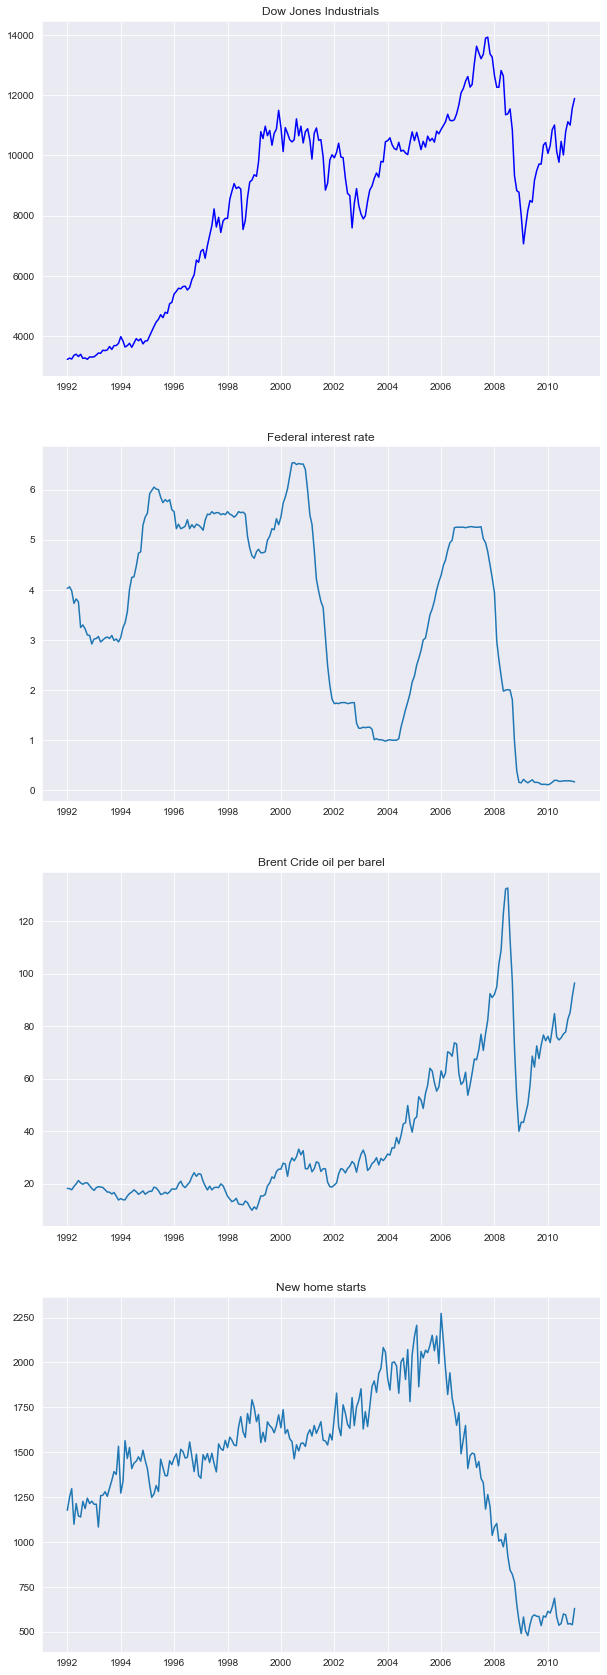

In [247]:
plt.figure(figsize=(10,30))
plt.subplot(4,1,1)
import matplotlib as plt 
from matplotlib import pyplot as plt
plt.plot(df_final['DATE'],df_final['CLOSE'],color='b')
plt.title('Dow Jones Industrials')
#plt.yticks([5000,10000,15000,20000,25000])
plt.subplot(4,1,2)
plt.plot(df_final['DATE'],df_final['FED INTRST %'])
plt.title('Federal interest rate')
plt.subplot(4,1,3)
plt.plot(df_final['DATE'],df_final['OIL PRICE'])
plt.title('Brent Cride oil per barel')
plt.subplot(4,1,4)
plt.plot(df_final['DATE'],df_final['NEW HOMES'])
plt.title('New home starts')


7- Drop the less useful columns

In [257]:
df_final=df_final.drop(['OPEN','YEAR'],axis=1)

8- Create a new column / feature from subtracting the LOW and HIGH column called SPREAD which is the difference between the two.

In [258]:
df_final['SPREAD']=df_final['HIGH']-df_final['LOW']
df_final=df_final.drop(['HIGH','LOW'],axis=1)
df_final

,DATE,CLOSE,SPREAD,ADJ CLOSE,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,3223.399902,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1,1992-02-01,3267.699951,85.419922,3267.699951,7.4,18.05,1250.0,13.3,226240,4.06,68.8
2,1992-03-01,3235.500000,111.359864,3235.500000,7.4,17.63,1297.0,13.4,227407,3.98,76
3,1992-04-01,3359.100098,205.270020,3359.100098,7.4,18.92,1099.0,13.2,228978,3.73,77.2
4,1992-05-01,3396.899902,116.649902,3396.899902,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...
224,2010-09-01,10788.049805,932.870117,10788.049805,9.5,77.84,594.0,15.3,429623,0.19,68.2
225,2010-10-01,11118.490234,536.479492,11118.490234,9.4,82.67,543.0,15.9,432584,0.19,67.7
226,2010-11-01,11006.019531,522.250000,11006.019531,9.8,85.28,545.0,15.9,436032,0.19,71.6
227,2010-12-01,11577.509766,617.769531,11577.509766,9.3,91.45,539.0,15.6,435673,0.18,74.5


9- Move the SPREAD column next to CLOSE as they are related

In [260]:
df_final=df_final.reindex(columns= ['DATE', 'CLOSE', 'SPREAD','ADJ CLOSE', 'UNEMP %', 'OIL PRICE', 'NEW HOMES', 'NEW CARS SOLD', 'RETAIL SALES', 'FED INTRST %', 'CSI'])
df_final

,DATE,CLOSE,SPREAD,ADJ CLOSE,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,3223.399902,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1,1992-02-01,3267.699951,85.419922,3267.699951,7.4,18.05,1250.0,13.3,226240,4.06,68.8
2,1992-03-01,3235.500000,111.359864,3235.500000,7.4,17.63,1297.0,13.4,227407,3.98,76
3,1992-04-01,3359.100098,205.270020,3359.100098,7.4,18.92,1099.0,13.2,228978,3.73,77.2
4,1992-05-01,3396.899902,116.649902,3396.899902,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...
224,2010-09-01,10788.049805,932.870117,10788.049805,9.5,77.84,594.0,15.3,429623,0.19,68.2
225,2010-10-01,11118.490234,536.479492,11118.490234,9.4,82.67,543.0,15.9,432584,0.19,67.7
226,2010-11-01,11006.019531,522.250000,11006.019531,9.8,85.28,545.0,15.9,436032,0.19,71.6
227,2010-12-01,11577.509766,617.769531,11577.509766,9.3,91.45,539.0,15.6,435673,0.18,74.5


10- Reset the index 

In [261]:
df_final.set_index('DATE')

,CLOSE,SPREAD,ADJ CLOSE,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
DATE,,,,,,,,,,
1992-01-01,3223.399902,159.879882,3223.399902,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1992-02-01,3267.699951,85.419922,3267.699951,7.4,18.05,1250.0,13.3,226240,4.06,68.8
1992-03-01,3235.500000,111.359864,3235.500000,7.4,17.63,1297.0,13.4,227407,3.98,76
1992-04-01,3359.100098,205.270020,3359.100098,7.4,18.92,1099.0,13.2,228978,3.73,77.2
1992-05-01,3396.899902,116.649902,3396.899902,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...
2010-09-01,10788.049805,932.870117,10788.049805,9.5,77.84,594.0,15.3,429623,0.19,68.2
2010-10-01,11118.490234,536.479492,11118.490234,9.4,82.67,543.0,15.9,432584,0.19,67.7
2010-11-01,11006.019531,522.250000,11006.019531,9.8,85.28,545.0,15.9,436032,0.19,71.6


11- View final dataframe correlation matrix


In [262]:
df_final.corr()

,CLOSE,SPREAD,ADJ CLOSE,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %
CLOSE,1.000000,0.476443,1.000000,-0.265325,0.634156,0.117390,0.029060,0.837977,-0.131466
SPREAD,0.476443,1.000000,0.476443,-0.094928,0.279716,-0.158782,-0.000159,0.482321,-0.174402
ADJ CLOSE,1.000000,0.476443,1.000000,-0.265325,0.634156,0.117390,0.029060,0.837977,-0.131466
UNEMP %,-0.265325,-0.094928,-0.265325,1.000000,0.283250,-0.735444,0.283717,0.201655,-0.738753
OIL PRICE,0.634156,0.279716,0.634156,0.283250,1.000000,-0.399984,0.114704,0.832086,-0.399689
NEW HOMES,0.117390,-0.158782,0.117390,-0.735444,-0.399984,1.000000,0.074926,-0.305401,0.362390
NEW CARS SOLD,0.029060,-0.000159,0.029060,0.283717,0.114704,0.074926,1.000000,0.116081,-0.483272
RETAIL SALES,0.837977,0.482321,0.837977,0.201655,0.832086,-0.305401,0.116081,1.000000,-0.424045
FED INTRST %,-0.131466,-0.174402,-0.131466,-0.738753,-0.399689,0.362390,-0.483272,-0.424045,1.000000


12- Compare your final result with data on file `../data/cleaned_timeseries.csv`

In [263]:
comparison= pd.read_csv("../data/cleaned_timeseries.csv") 
display(comparison)
display(df_final)

,DATE,CLOSE,SPREAD,VOLUME,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,5.611600e+08,7.3,18.16,1176.0,12.6,146913.0,4.03,67.5
1,1992-02-01,3267.699951,85.419922,4.111500e+08,7.4,18.05,1250.0,12.9,147270.0,4.06,68.8
2,1992-03-01,3235.500000,111.359864,4.024100e+08,7.4,17.63,1297.0,12.8,146831.0,3.98,76.0
3,1992-04-01,3359.100098,205.270020,4.583000e+08,7.4,18.92,1099.0,12.6,148082.0,3.73,77.2
4,1992-05-01,3396.899902,116.649902,3.882400e+08,7.6,19.89,1214.0,13.1,149015.0,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...
303,2017-08-01,21948.099609,578.769531,6.150060e+09,4.4,51.70,1172.0,16.4,419882.0,1.16,96.8
304,2017-09-01,22405.089844,709.878907,6.342130e+09,4.2,56.15,1159.0,18.9,429623.0,1.15,95.1
305,2017-10-01,23377.240234,1069.250000,7.302910e+09,4.1,57.51,1261.0,18.4,432584.0,1.15,100.7
306,2017-11-01,24272.349609,1085.070313,7.335640e+09,4.1,62.71,1299.0,17.9,436032.0,1.16,98.5


,DATE,CLOSE,SPREAD,ADJ CLOSE,UNEMP %,OIL PRICE,NEW HOMES,NEW CARS SOLD,RETAIL SALES,FED INTRST %,CSI
0,1992-01-01,3223.399902,159.879882,3223.399902,7.3,18.16,1176.0,12.8,224020,4.03,67.5
1,1992-02-01,3267.699951,85.419922,3267.699951,7.4,18.05,1250.0,13.3,226240,4.06,68.8
2,1992-03-01,3235.500000,111.359864,3235.500000,7.4,17.63,1297.0,13.4,227407,3.98,76
3,1992-04-01,3359.100098,205.270020,3359.100098,7.4,18.92,1099.0,13.2,228978,3.73,77.2
4,1992-05-01,3396.899902,116.649902,3396.899902,7.6,19.89,1214.0,13.0,231238,3.82,79.2
...,...,...,...,...,...,...,...,...,...,...,...
224,2010-09-01,10788.049805,932.870117,10788.049805,9.5,77.84,594.0,15.3,429623,0.19,68.2
225,2010-10-01,11118.490234,536.479492,11118.490234,9.4,82.67,543.0,15.9,432584,0.19,67.7
226,2010-11-01,11006.019531,522.250000,11006.019531,9.8,85.28,545.0,15.9,436032,0.19,71.6
227,2010-12-01,11577.509766,617.769531,11577.509766,9.3,91.45,539.0,15.6,435673,0.18,74.5


13- What's your conclusion ?
> Write you answer here
I have less rows in my dataframe as the date stopped at 2011, while the csv file's dtaframe reaches 2017.